In [ ]:
!pip install pysiology

In [ ]:
from google.colab import files
files.upload()

In [3]:
#@title Fix
import os,shutil
os.remove("/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py")
shutil.move("/content/electromyography.py","/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py")

'/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py'

In [ ]:
! wget -r -N -c -np https://physionet.org/files/gaitndd/1.0.0/

In [5]:
import pysiology
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore. https://doi.org/10.1007/978-981-13-8950-4_35


In [38]:


#EDA
from collections import Counter
# import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
# from mlxtend.classifier import StackingCVClassifier

In [ ]:
data_1 = pd.read_csv("physionet.org/files/gaitndd/1.0.0/als1.ts",delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])

data_1.head()

In [ ]:
dataset_path = "physionet.org/files/gaitndd/1.0.0"
dict_data = {'MNF': [], 'MDF': [],'PeakFrequency': [], 'MNP': [],'TTP': [], 'SM1': [],'SM2': [], 'SM3': []
  ,'FR': [], 'PSR': [], 'VCF': [],'IEMG': [], 'MAV': [], 'MAV1': [], 
 'MAV2': [], 'SSI': [], 'VAR': [], 'TM3': [], 'TM4': [], 'TM5': [],  
 'LOG': [], 'RMS': [], 'WL': [], 'AAC': [], 'DASDV': [], 'ZC': [], 'MYOP':[],   
 'WAMP': [], 'SSC': [], 'MAVSLPk1':[],"MAVSLPk2":[],"MAVSLPk3":[],"label":[]}
  
folders = [os.path.join(dataset_path, folder_name) for folder_name in os.listdir(dataset_path) if str(folder_name).endswith(".ts")]  
  
labels = ["als","control","hunt","park"]
for folder in folders:  
  if(re.split("\d", str(folder.split("/")[4]))[0] != "example"):
    df = pd.read_csv(folder,delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",  
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",  
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",  
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])
    target = ["Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)","Right Swing Interval (sec)",
              "Left Stance Interval (sec)","Right Stance Interval (sec)","Double Support Interval (sec)"] 
    label = labels.index(re.split("\d", str(folder.split("/")[4]))[0]) 
    for f in target:
      data = df[f]
      analyzedEMG = pysiology.electromyography.analyzeEMGnew(data,samplerate=200,preprocessing=False) 
      time,freq = analyzedEMG

      freq = analyzedEMG[freq]
      keys1 = list(freq.keys())

      for i in keys1 :
        dict_data[i].append(freq[i])

      time = analyzedEMG[time]
      keys2 = list(time.keys())[:-1]

      for i in keys2 :
        dict_data[i].append(time[i])

      dict_data["MAVSLPk1"].append(time["MAVSLPk"][0])
      dict_data["MAVSLPk2"].append(time["MAVSLPk"][1])
      dict_data["MAVSLPk3"].append(time["MAVSLPk"][2])
      dict_data["label"].append(label)

dataFrame = pd.DataFrame(dict_data)

In [ ]:
dataFrame

In [ ]:
dataFrame.iloc[:60,:16]

In [ ]:
dataFrame.iloc[:60,16:]

In [159]:
dataFrame.columns

Index(['MNF', 'MDF', 'PeakFrequency', 'MNP', 'TTP', 'SM1', 'SM2', 'SM3', 'FR',
       'PSR', 'VCF', 'IEMG', 'MAV', 'MAV1', 'MAV2', 'SSI', 'VAR', 'TM3', 'TM4',
       'TM5', 'LOG', 'RMS', 'WL', 'AAC', 'DASDV', 'ZC', 'MYOP', 'WAMP', 'SSC',
       'MAVSLPk1', 'MAVSLPk2', 'MAVSLPk3', 'label'],
      dtype='object')

In [160]:
dataFrame =  dataFrame.drop(columns='FR')
dataFrame =  dataFrame.drop(columns='ZC')
dataFrame =  dataFrame.drop(columns='MYOP')

In [ ]:
!pip -q install dataprep

In [ ]:

from dataprep.eda import plot, plot_correlation, plot_missing,create_db_report,create_report
report = create_report(dataFrame)
report

In [ ]:
dataFrame["label"].unique()

array([1, 2, 3, 0])

In [175]:
  als = dataFrame[dataFrame.label == 0]
  control = dataFrame[dataFrame.label==1]
  hunt = dataFrame[dataFrame.label==2]
  park = dataFrame[dataFrame.label==3]

In [176]:
def plot_scatter(x,y):
  fig, ax = plt.subplots()
  fig.set_size_inches(13, 7) 
  # lables and scatter points
  ax.scatter(als[x], als[y], label="als", facecolor="blue")
  ax.scatter(control[x], control[y], label="control", facecolor="green")
  ax.scatter(hunt[x], hunt[y], label="hunt", facecolor="red")
  ax.scatter(park[x], park[y], label="park", facecolor="Yellow")
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.grid()
  ax.set_title("")
  ax.legend()

In [ ]:
plot_scatter('MNF', 'MDF')

In [ ]:
plot_scatter('WL', 'AAC')

In [ ]:
# plt.figure(figsize=(50,50))
# sns.heatmap(dataFrame.corr())

In [161]:
data.describe()

count    277.000000
mean       0.266257
std        0.031327
min        0.233300
25%        0.253300
50%        0.260000
75%        0.270000
max        0.633300
Name: Double Support Interval (sec), dtype: float64

# train model

In [162]:
from sklearn.model_selection import train_test_split

# Set up X and y variables
y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('int64')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("shape of X_train data: ", X_train.shape)
print("shape of y_train data: ", y_train.shape)
print("shape of X_test data: ", X_test.shape)
print("shape of y_test data: ", y_test.shape)

shape of X_train data:  (358, 29)
shape of y_train data:  (358,)
shape of X_test data:  (90, 29)
shape of y_test data:  (90,)


## LogisticRegression

In [163]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=5000,solver='lbfgs', fit_intercept=True,intercept_scaling=1)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[11  3  0  1]
 [ 0 21  0  4]
 [ 4  0 23  2]
 [ 3  3  7  8]]


Accuracy of Logistic Regression: 70.0 

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.78      0.84      0.81        25
           2       0.77      0.79      0.78        29
           3       0.53      0.38      0.44        21

    accuracy                           0.70        90
   macro avg       0.67      0.69      0.67        90
weighted avg       0.69      0.70      0.69        90



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

In [164]:
m2 = 'Naive Bayes'
nb = GaussianNB( var_smoothing=1e-018)
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred,zero_division=0))

confussion matrix
[[ 2  8  5  0]
 [ 0 25  0  0]
 [ 2 18  9  0]
 [ 1 20  0  0]]


Accuracy of Naive Bayes model: 40.0 

              precision    recall  f1-score   support

           0       0.40      0.13      0.20        15
           1       0.35      1.00      0.52        25
           2       0.64      0.31      0.42        29
           3       0.00      0.00      0.00        21

    accuracy                           0.40        90
   macro avg       0.35      0.36      0.28        90
weighted avg       0.37      0.40      0.31        90



##  Support Vector Machine

In [165]:
m3 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2, max_iter=-1)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted,zero_division=0))

confussion matrix
[[ 2  0 13  0]
 [ 0  0 25  0]
 [ 2  0 27  0]
 [ 0  0 21  0]]


Accuracy of Support Vector Classifier: 32.22222222222222 

              precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.00      0.00      0.00        25
           2       0.31      0.93      0.47        29
           3       0.00      0.00      0.00        21

    accuracy                           0.32        90
   macro avg       0.20      0.27      0.17        90
weighted avg       0.18      0.32      0.19        90



## DecisionTreeClassifier

In [166]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 32)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[13  0  1  1]
 [ 1 18  2  4]
 [ 4  2 16  7]
 [ 2  3  8  8]]


Accuracy of DecisionTreeClassifier: 61.111111111111114 

              precision    recall  f1-score   support

           0       0.65      0.87      0.74        15
           1       0.78      0.72      0.75        25
           2       0.59      0.55      0.57        29
           3       0.40      0.38      0.39        21

    accuracy                           0.61        90
   macro avg       0.61      0.63      0.61        90
weighted avg       0.61      0.61      0.61        90



## RandomForestClassifier

In [167]:
m5 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=26, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[11  3  1  0]
 [ 0 23  2  0]
 [ 5  1 21  2]
 [ 1  1 10  9]]


Accuracy of Random Forest: 71.11111111111111 

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.82      0.92      0.87        25
           2       0.62      0.72      0.67        29
           3       0.82      0.43      0.56        21

    accuracy                           0.71        90
   macro avg       0.73      0.70      0.70        90
weighted avg       0.73      0.71      0.70        90



## KNeighborsClassifier

In [168]:
m6 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[ 5  3  3  4]
 [ 0 18  6  1]
 [ 0  6 20  3]
 [ 2  8 10  1]]


Accuracy of K-NeighborsClassifier: 48.888888888888886 

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.51      0.72      0.60        25
           2       0.51      0.69      0.59        29
           3       0.11      0.05      0.07        21

    accuracy                           0.49        90
   macro avg       0.46      0.45      0.43        90
weighted avg       0.45      0.49      0.45        90



## Extreme Gradient Boost

In [169]:
m7 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[11  3  1  0]
 [ 0 21  2  2]
 [ 5  1 18  5]
 [ 1  2 11  7]]


Accuracy of Extreme Gradient Boost: 63.33333333333333 

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.78      0.84      0.81        25
           2       0.56      0.62      0.59        29
           3       0.50      0.33      0.40        21

    accuracy                           0.63        90
   macro avg       0.62      0.63      0.62        90
weighted avg       0.62      0.63      0.62        90



# AdaBoostClassifier

In [170]:
m8 = 'Ada Boost Classifier'
Ada = AdaBoostClassifier(n_estimators=500, learning_rate = 0.75)
Ada.fit(X_train,y_train)
Ada_predicted = Ada.predict(X_test)
Ada_conf_matrix = confusion_matrix(y_test, Ada_predicted)
Ada_acc_score = accuracy_score(y_test, Ada_predicted)
print("confussion matrix")
print(Ada_conf_matrix)
print("\n")
print("Accuracy of Ada Boost:",Ada_acc_score*100,'\n')
print(classification_report(y_test,Ada_predicted))

confussion matrix
[[10  0  1  4]
 [ 1 19  2  3]
 [ 5  1 16  7]
 [ 1  2  8 10]]


Accuracy of Ada Boost: 61.111111111111114 

              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.86      0.76      0.81        25
           2       0.59      0.55      0.57        29
           3       0.42      0.48      0.44        21

    accuracy                           0.61        90
   macro avg       0.62      0.61      0.61        90
weighted avg       0.63      0.61      0.62        90



# LDA

In [171]:

m9 = 'Linear Discriminant Analysis'
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
LDA_predicted = LDA.predict(X_test)
LDA_conf_matrix = confusion_matrix(y_test, LDA_predicted)
LDA_acc_score = accuracy_score(y_test, LDA_predicted)
print("confussion matrix")
print(LDA_conf_matrix)
print("\n")
print("Accuracy of Linear Discriminant Analysis:",LDA_acc_score*100,'\n')
print(classification_report(y_test,LDA_predicted))


confussion matrix
[[12  2  0  1]
 [ 1 20  1  3]
 [ 2  2 22  3]
 [ 2  3  8  8]]


Accuracy of Linear Discriminant Analysis: 68.88888888888889 

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.74      0.80      0.77        25
           2       0.71      0.76      0.73        29
           3       0.53      0.38      0.44        21

    accuracy                           0.69        90
   macro avg       0.67      0.68      0.67        90
weighted avg       0.68      0.69      0.68        90



#Perceptron

In [172]:
m9 = 'Linear Discriminant Analysis'
Perc = Perceptron(random_state=0,max_iter=1000)
Perc.fit(X_train,y_train)
Perc_predicted = Perc.predict(X_test)
Perc_conf_matrix = confusion_matrix(y_test, Perc_predicted)
Perc_acc_score = accuracy_score(y_test, Perc_predicted)
print("confussion matrix")
print(Perc_conf_matrix)
print("\n")
print("Accuracy of Perceptron:",Perc_acc_score*100,'\n')
print(classification_report(y_test,Perc_predicted))

confussion matrix
[[ 7  1  7  0]
 [ 0 10 10  5]
 [ 4  1 22  2]
 [ 1  4 13  3]]


Accuracy of Perceptron: 46.666666666666664 

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.62      0.40      0.49        25
           2       0.42      0.76      0.54        29
           3       0.30      0.14      0.19        21

    accuracy                           0.47        90
   macro avg       0.48      0.44      0.44        90
weighted avg       0.48      0.47      0.44        90



## conclusion

In [173]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine',"Ada Boost","LDA","Perceptron"], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,Ada_acc_score*100,LDA_acc_score*100,Perc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,70.000000
1,Naive Bayes,40.000000
2,Random Forest,71.111111
3,Extreme Gradient Boost,63.333333
4,K-Nearest Neighbour,48.888889
5,Decision Tree,61.111111
6,Support Vector Machine,32.222222
7,Ada Boost,61.111111
8,LDA,68.888889
9,Perceptron,46.666667


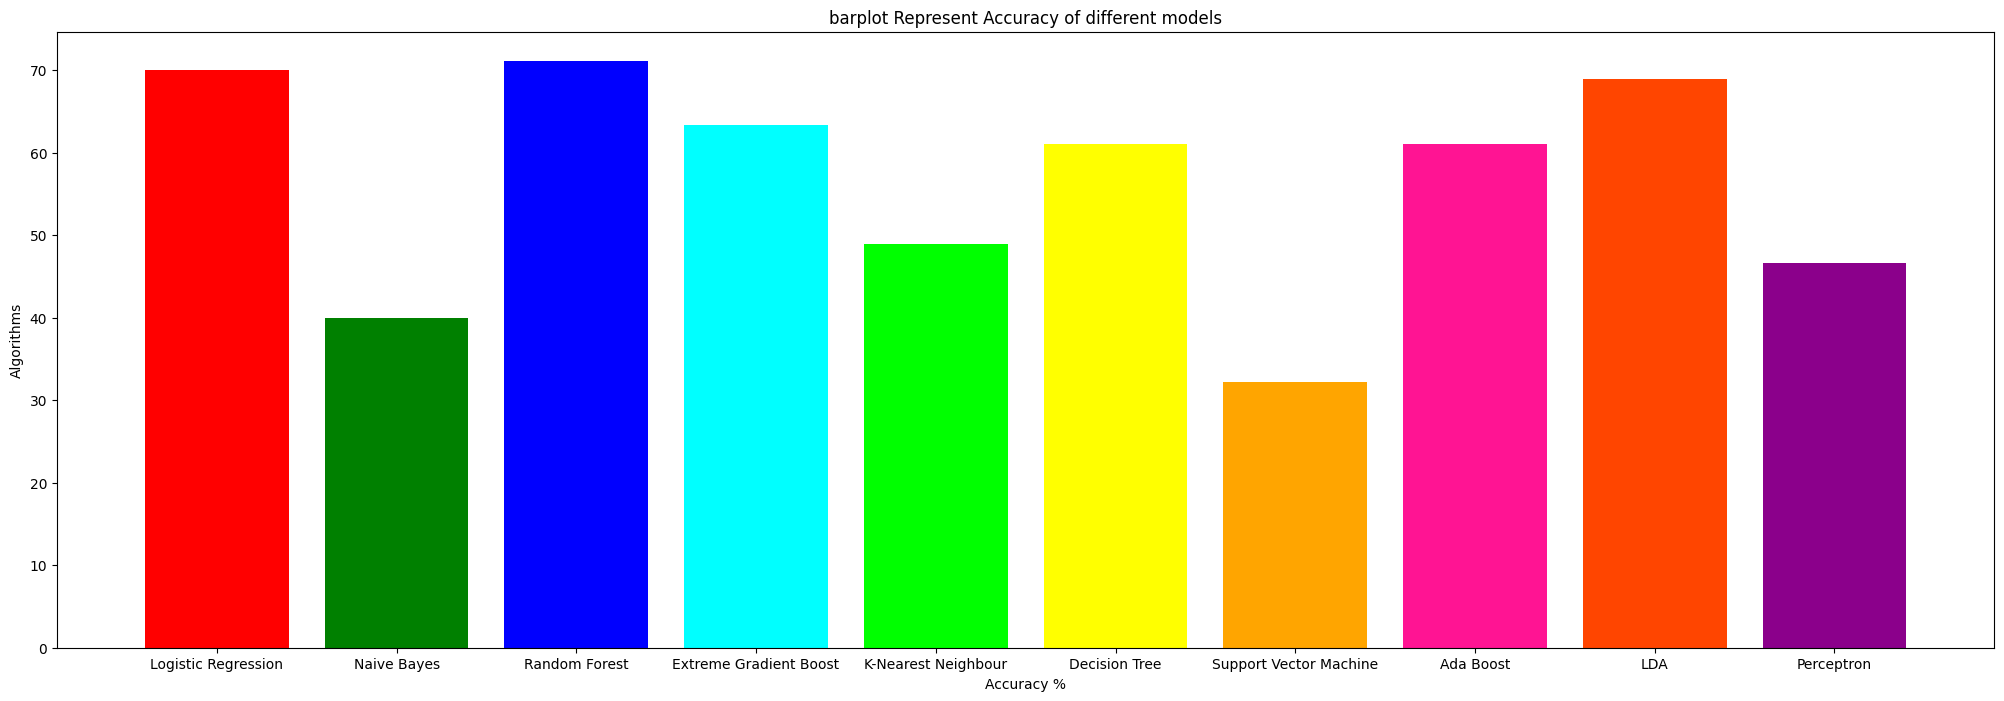

In [174]:
colors = ['red','green','blue','Cyan','Lime','yellow','orange',"DeepPink","OrangeRed","DarkMagenta"]
plt.figure(figsize=(25,8))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()